In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('cdp.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,WorkingHours,StepsPerDay,SleepHours
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,8.5,7500,7.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,9.2,11000,6.5
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,10.1,8200,8.2
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,7.8,5000,7.8
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,8.7,6700,6.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
 16  WorkingHours     4240 non-null   float64
 17  StepsPerDay   

In [4]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,WorkingHours,StepsPerDay,SleepHours
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887,8.946203,8529.834906,7.458939
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953,1.093149,1711.185733,0.667862
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,7.100000,4500.000000,6.100000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000,8.100000,7200.000000,6.900000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000,8.900000,8700.000000,7.300000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000,9.800000,9900.000000,8.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,10.900000,11800.000000,8.900000


In [5]:
print(data.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
WorkingHours         0
StepsPerDay          0
SleepHours           0
dtype: int64


In [6]:
data.fillna(method="ffill", inplace=True)
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,WorkingHours,StepsPerDay,SleepHours
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,8.5,7500,7.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,9.2,11000,6.5
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,10.1,8200,8.2
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,7.8,5000,7.8
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,8.7,6700,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,8.7,5400,7.4
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,86.0,0,9.8,9600,8.6
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,7.9,10500,7.1
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0,8.4,8700,6.9


In [7]:
print(data.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
WorkingHours       0
StepsPerDay        0
SleepHours         0
dtype: int64


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
 16  WorkingHours     4240 non-null   float64
 17  StepsPerDay   

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
# Impute missing values using mean imputation (you can choose other strategies)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [10]:
print(data_imputed.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
WorkingHours       0
StepsPerDay        0
SleepHours         0
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [12]:
# Outlier detection and removal using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
outliers = outlier_detector.fit_predict(data_imputed)
data_no_outliers = data_imputed[outliers == 1]

In [130]:
# Feature Engineering
categorical_feature = 'TenYearCHD'
relevant_features = ['age', 'Working Hours', 'BMI', 'Steps Taken', 'Sleep Hours', categorical_feature]

In [131]:
print(data_no_outliers.columns)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'WorkingHours',
       'StepsPerDay', 'SleepHours'],
      dtype='object')


In [132]:
data.to_csv('cleaned_cdp.csv', index=False)
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,WorkingHours,StepsPerDay,SleepHours
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,8.5,7500,7.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,9.2,11000,6.5
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,10.1,8200,8.2
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,7.8,5000,7.8
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,8.7,6700,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0,8.7,5400,7.4
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,86.0,0,9.8,9600,8.6
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,7.9,10500,7.1
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0,8.4,8700,6.9


In [134]:
# Select relevant features and target variable
features = ['age', 'WorkingHours', 'BMI', 'StepsPerDay', 'SleepHours','TenYearCHD']
target = 'TenYearCHD'  # Assuming this column indicates the presence of cardiac disease (1 or 0)

# Split the data into features (X) and target variable (y)
X = data[features]
y = data[target]

In [135]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [138]:
# Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [139]:
# Make predictions on the testing set
y_pred_lr = lr_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

In [140]:
# Evaluate the models
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [141]:
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"SVM Accuracy: {accuracy_svm}")

Logistic Regression Accuracy: 1.0
SVM Accuracy: 1.0


In [142]:
# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

Confusion Matrix for Logistic Regression:
[[725   0]
 [  0 123]]


In [143]:
# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)

Confusion Matrix for SVM:
[[725   0]
 [  0 123]]


In [144]:
# ROC Curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

In [146]:
# ROC Curve and AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

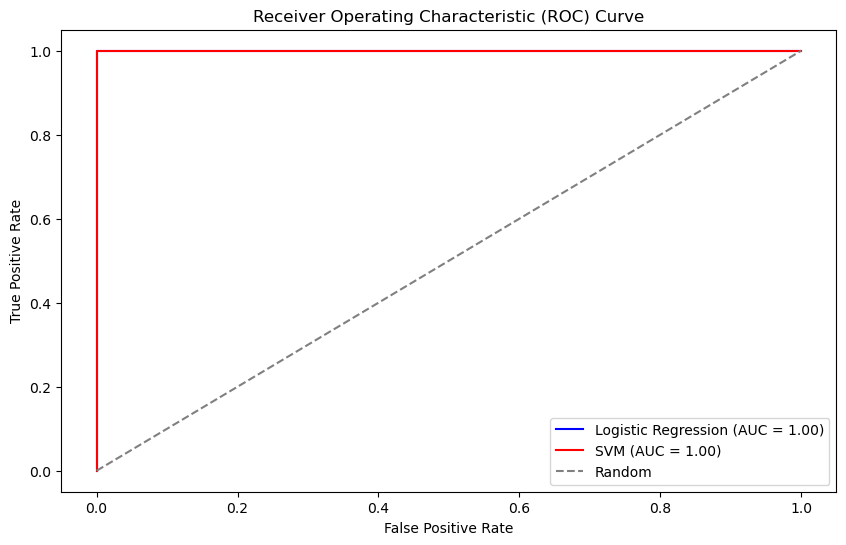

In [147]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [148]:
# Feature Importance for Logistic Regression
feature_importance_lr = pd.DataFrame({'Feature': features, 'Importance': lr_model.coef_[0]})
feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False)

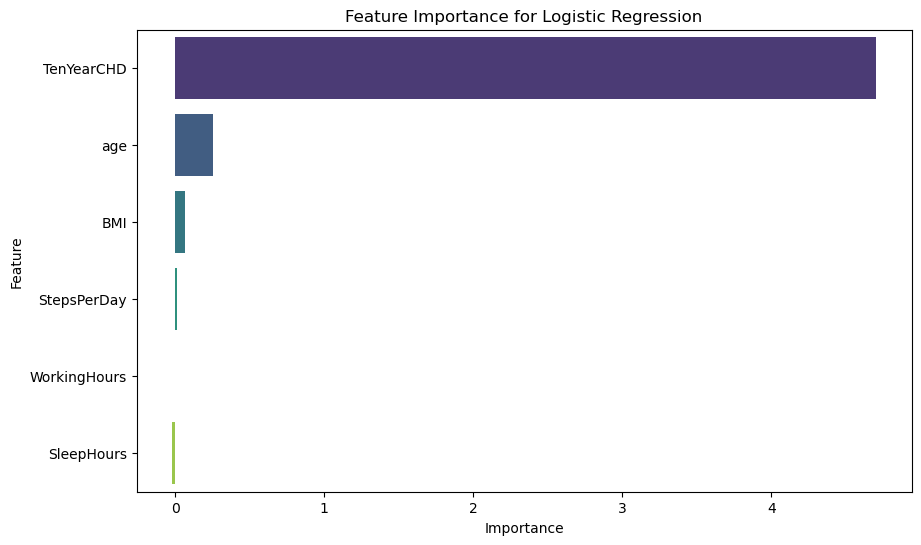

In [149]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_lr, palette='viridis')
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [151]:
# Assuming 'categorical_feature' is a categorical variable in your dataset
categorical_feature = 'TenYearCHD'

# Print the columns of the original dataset
print("Columns in the original dataset:")
print(data.columns)

# Include 'categorical_feature' in the list of relevant features
relevant_features = ['age', 'WorkingHours', 'BMI', 'StepsPerDay', 'SleepHours',categorical_feature]

# Fit the scaler on the training data and then transform the user input
scaler.fit(data[relevant_features])

# Print the columns used for fitting the scaler
print("Columns used for fitting the scaler:")
print(relevant_features)

Columns in the original dataset:
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'WorkingHours',
       'StepsPerDay', 'SleepHours'],
      dtype='object')
Columns used for fitting the scaler:
['age', 'WorkingHours', 'BMI', 'StepsPerDay', 'SleepHours', 'TenYearCHD']


In [167]:
# Get input from the user for all relevant features
user_input = {}
for feature in relevant_features:
    user_input[feature] = float(input(f"Enter the value for {feature}: "))

# Convert user input to a DataFrame
user_data = pd.DataFrame([user_input])

# Standardize the user input
user_data_standardized = scaler.transform(user_data)

# Display the standardized user input
print("Standardized User Input:")
print(user_data_standardized)

Enter the value for age: 12
Enter the value for WorkingHours: 8
Enter the value for BMI: 25
Enter the value for StepsPerDay: 11000
Enter the value for SleepHours: 8
Enter the value for TenYearCHD: 1
Standardized User Input:
[[-4.38409829 -0.86567736 -0.19431246  1.44371028  0.81023514  2.36301734]]


In [168]:
# Create a DataFrame with the user's input
user_data = pd.DataFrame([user_input])

In [169]:
# Predict using the logistic regression model
prediction_lr = lr_model.predict(user_data_standardized)[0]
probability_lr = lr_model.predict_proba(user_data_standardized)[0, 1]

In [170]:
# Predict using the SVM model
prediction_svm = svm_model.predict(user_data_standardized)[0]
probability_svm = svm_model.predict_proba(user_data_standardized)[0, 1]

In [171]:
# Display predictions
print("\nLogistic Regression Prediction:")
print(f"Likelihood of Cardiac Disease: {probability_lr:.2%}")
print(f"Predicted Outcome: {'Positive' if prediction_lr == 1 else 'Negative'}")



Logistic Regression Prediction:
Likelihood of Cardiac Disease: 98.97%
Predicted Outcome: Positive


In [172]:
print("\nSVM Prediction:")
print(f"Likelihood of Cardiac Disease: {probability_svm:.2%}")
print(f"Predicted Outcome: {'Positive' if prediction_svm == 1 else 'Negative'}")


SVM Prediction:
Likelihood of Cardiac Disease: 64.59%
Predicted Outcome: Positive
